In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#plt.style.use('classic')
#plt.style.use('ggplot')
#plt.style.use('seaborn-whitegrid')

In [3]:
acpos = []; inpos = []

for i in range(301):
    acpos_ = pd.read_csv('data2/ActivePos_3s113R0.8Ts'+str(i)+'.csv', names=['ac'])
    acpos.append(acpos_)
    inpos_ = pd.read_csv('data2/InactivePos_3s113R0.8Ts'+str(i)+'.csv', names=['in'])
    inpos.append(inpos_)

/home/nitta/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


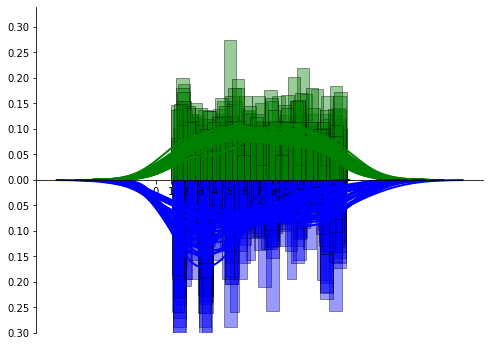

In [4]:
fig, ax = plt.subplots(figsize=(8, 6))
bin_no = 13

for i in range(0,30):
    sns.distplot(acpos[i]['ac'], hist=True, kde=True, hist_kws={'edgecolor': 'black'}, \
                 kde_kws={'linewidth': 2}, bins=bin_no, color='green', label='Inactive motors')
    
    for p in ax.patches:  # turn the histogram upside down
        p.set_height(-p.get_height())
    for l in ax.lines:  # turn the kde curve upside down
        l.set_ydata(-l.get_ydata())

    sns.distplot(inpos[i]['in'], hist=True, kde=True, hist_kws={'edgecolor': 'black'}, \
                 kde_kws={'linewidth': 2}, bins=bin_no, color='blue', label='Active motors')
    for p in ax.patches:  # turn the histogram upside down
        p.set_height(-p.get_height())
    for l in ax.lines:  # turn the kde curve upside down
        l.set_ydata(-l.get_ydata())

    ax.set_xticks(np.arange(0, 14, 1))
    #ax.set_yticks(np.arange(0.0, 0.07, 0.01))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    pos_ticks = np.array([t for t in ax.get_yticks() if t > 0])
    ticks = np.concatenate([-pos_ticks[::-1], [0], pos_ticks])
    ax.set_yticks(ticks)
    ax.set_yticklabels([f'{abs(t):.2f}' for t in ticks])
    ax.spines['bottom'].set_position('zero')
    #ax.set_xlabel('Actin length position')
    #ax.set_ylabel('Probability density')
    #plt.legend()

plt.show()

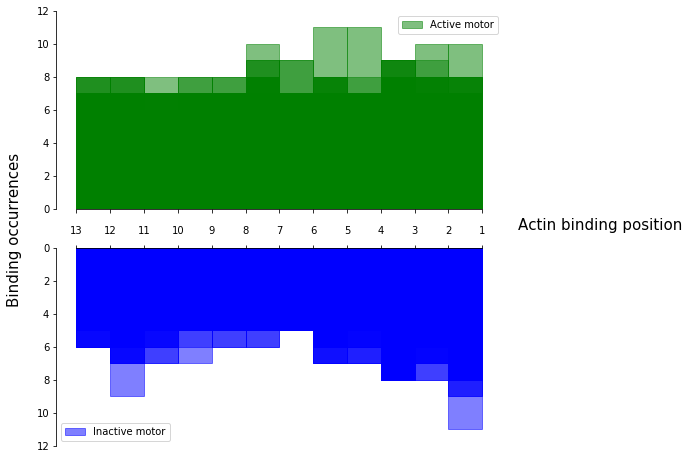

In [5]:
fig =plt.figure(figsize=(8,8))
ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

bins = np.arange(1,14,1)

for i in range(0,301):
    ax.hist(acpos[i]['ac'], bins=bins, facecolor='green', alpha=0.5, histtype='bar', ec='green', label='Active motor')
    ax.set_xticks(np.arange(1,14,1))
    ax.set_yticks(np.arange(0,13,2))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_bounds(1,13)
    ax.invert_xaxis()
    ax.tick_params(axis='x', which='both', pad=14)
    if i == 0:
        ax.legend()
    ax2.hist(inpos[i]['in'], bins=bins, facecolor='blue', alpha=0.5, histtype='bar', ec='blue', label='Inactive motor')
    ax2.set_xticks(np.arange(1,14,1))
    ax2.set_yticks(np.arange(0,13,2))
    ax2.spines['bottom'].set_position('zero')
    ax2.spines['bottom'].set_bounds(1,13)
    ax2.invert_yaxis()
    ax2.invert_xaxis()
    ax2.tick_params(axis='x', direction='in')#, length=6, width=2, colors='r',grid_color='r', grid_alpha=0.5)
    ax2.set_xticklabels([])
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    if i == 0:
        ax2.legend()

fig.text(1.07, 0.5, 'Actin binding position', ha='center', fontsize=15)
fig.text(0.04, 0.5, 'Binding occurrences', va='center', rotation='vertical', fontsize=15)

#plt.savefig('fig/motors_pos.svg', fmt='.svg', dpi=1200, bbox_inches='tight')
#plt.savefig('fig/motors_pos.png', fmt='.png', dpi=1200, bbox_inches='tight')

plt.show()

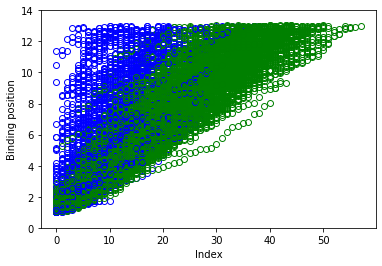

In [6]:
for i in range(301):
    plt.plot(acpos[i], marker='o', markerfacecolor='None', linestyle='', color='green')
    plt.plot(inpos[i], marker='o', markerfacecolor='none', linestyle='None', color='blue')
    plt.yticks(np.arange(0,15,2))
    plt.xlabel('Index')
    plt.ylabel('Binding position')

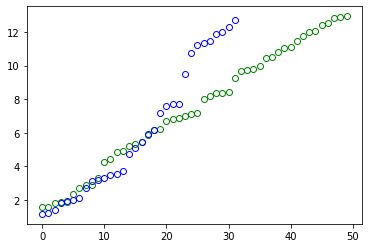

In [7]:
plt.plot(acpos[20], marker='o', markerfacecolor='None', linestyle='', color='green')
plt.plot(inpos[20], marker='o', markerfacecolor='none', linestyle='None', color='blue')

In [8]:
#import matplotlib.gridspec as gridspec

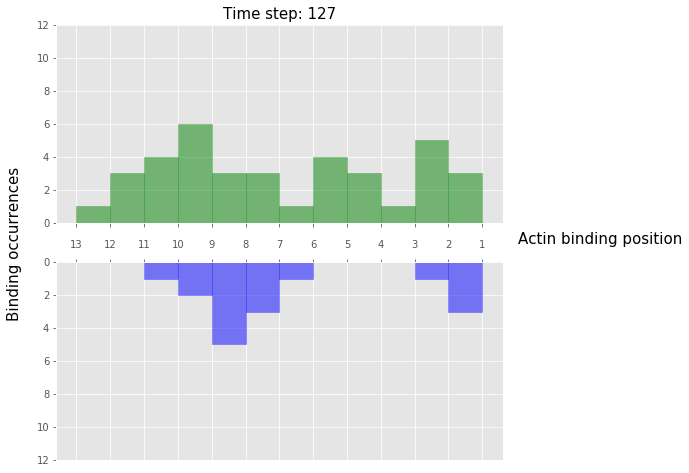

In [8]:
fig =plt.figure(figsize=(8,8))
ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

bins = np.arange(1,14,1)
count=1

for i in range(127,128):
    ax.hist(acpos[i]['ac'], bins=bins, facecolor='green', alpha=0.5, histtype='bar', ec='green', label='Active motor')
    ax.set_xticks(np.arange(1,14,1))
    ax.set_yticks(np.arange(0,13,2))
    ax.set_title('Time step: %s'%127, fontsize=15)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_bounds(1,13)
    ax.invert_xaxis()
    ax.tick_params(axis='x', which='both', pad=14)
    if i == 0:
        ax.legend()
    ax2.hist(inpos[i]['in'], bins=bins, facecolor='blue', alpha=0.5, histtype='bar', ec='blue', label='Inactive motor')
    ax2.set_xticks(np.arange(1,14,1))
    ax2.set_yticks(np.arange(0,13,2))
    ax2.spines['bottom'].set_position('zero')
    ax2.spines['bottom'].set_bounds(1,13)
    ax2.invert_yaxis()
    ax2.invert_xaxis()
    ax2.tick_params(axis='x', direction='in')#, length=6, width=2, colors='r',grid_color='r', grid_alpha=0.5)
    ax2.set_xticklabels([])
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    if i == 0:
        ax2.legend()
    count+=1

fig.text(1.07, 0.5, 'Actin binding position', ha='center', fontsize=15)
fig.text(0.04, 0.5, 'Binding occurrences', va='center', rotation='vertical', fontsize=15)

#plt.savefig('fig/motors_pos3s113Ts127.svg', fmt='.svg', dpi=1200, bbox_inches='tight')
#plt.savefig('fig/motors_pos3s113Ts127.png', fmt='.png', dpi=1200, bbox_inches='tight')

plt.show()

In [5]:
f = pd.read_csv('data3/Filament_3s113R0.8Ts127.csv', names=['x','y','z'], skiprows=1)
m1 = pd.read_csv('data3/Specie1_3s113R0.8Ts127.csv', names=['x','y','z'], skiprows=1)
m2 = pd.read_csv('data3/Specie2_3s113R0.8Ts127.csv', names=['x','y','z'], skiprows=1)

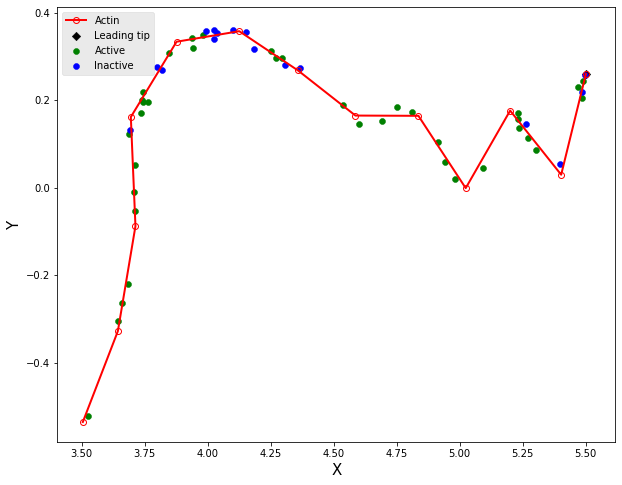

In [6]:
fig, ax = plt.subplots(figsize=(10,8))
plt.style.use('ggplot')

plt.plot(f['x'],f['y'], marker='o', color='red', markerfacecolor='None', linestyle='-', linewidth=2, label='Actin')
plt.scatter(f['x'][0],f['y'][0], marker='D', color='black', label='Leading tip')
plt.scatter(m1['x'], m1['y'], marker='o', color='green', label='Active')
plt.scatter(m2['x'], m2['y'], marker='o', color='blue', label='Inactive')

ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('Y', fontsize=15)
ax.legend()

#plt.savefig('fig/bm_pos3s113Ts127.svg', fmt='.svg', dpi=1200, bbox_inches='tight')
#plt.savefig('fig/bm_pos3s113Ts127.png', fmt='.png', dpi=1200, bbox_inches='tight')

plt.show()

In [82]:
acpos[0]['ac']

0      1.29278
1      2.48065
2      3.60379
3      3.74187
4      4.03287
5      4.70926
6      4.78580
7      4.97825
8      5.33890
9      5.39565
10     7.95232
11     8.27572
12     8.50350
13     9.23528
14     9.45268
15     9.65612
16     9.91109
17     9.96914
18    10.14732
19    11.55768
20    11.91337
21    12.10216
Name: ac, dtype: float64

In [83]:
#acpos[0].loc[(acpos[0]['ac'] >= 11) & (acpos[0]['ac'] <= 12)]
acpos[0].loc[acpos[0]['ac'].between(11,12)]

,ac
19,11.55768
20,11.91337


In [105]:
# collect active/inactive binding motors between beads
acpos1_2 = []; acpos2_3 = []; acpos12_13 = []

# prepare 12 empty buckets to put numbers between beads    

for i in range(301):
    acpos1_2_ = acpos[i].loc[acpos[i]['ac'].between(1,2)]
    acpos1_2.append(acpos1_2_)
    acpos2_3_ = acpos[i].loc[acpos[i]['ac'].between(2,3)]
    acpos2_3.append(acpos2_3_)
    acpos12_13_ = acpos[i].loc[acpos[i]['ac'].between(12,13)]
    acpos12_13.append(acpos12_13_)
    
#aclist = [np.array(i) for i in acpos1_2] # make all lists arrays
#ac1_2 = np.concatenate(aclist, axis=0) # combine all arrays into one array
#ac1_2mn = np.mean(ac1_2) # calculate mean

In [78]:
ac = [[] for _ in range(12)]

In [79]:
ac[2].append(2)
ac

[[], [], [2], [], [], [], [], [], [], [], [], []]

In [125]:
# collect active/inactive binding motors between beads
# prepare 12 empty buckets to put numbers between beads

ac = [[] for _ in range(12)]

for i in range(301):
    for j in range(12):
        acposx = acpos[i].loc[acpos[i]['ac'].between(j+1,j+2)]
        ac[j].append(acposx)

# Inactive:        
ina = [[] for _ in range(12)]

for i in range(301):
    for j in range(12):
        inposx = inpos[i].loc[inpos[i]['in'].between(j+1,j+2)]
        ina[j].append(inposx)

In [106]:
acpos12_13[33]

,ac
48,12.57293
49,12.81869
50,12.99759


In [107]:
ac[11][33]

,ac
48,12.57293
49,12.81869
50,12.99759


In [63]:
# get the number of active/inactive motors binding between beads
abm1_2 = []

for i in range(301):
    abm1_2_ = len(acpos1_2[i])
    abm1_2.append(abm1_2_)
    
# get the mean and std deviation
abm1_2mn = round(np.mean(abm1_2),0)
abm1_2std = round(np.std(abm1_2),0)

In [147]:
# get the number of active/inactive motors binding between beads
precision = 5

abm = [[] for _ in range(12)]

for i in range(301):
    for j in range(12):
        abmx = len(ac[j][i])
        abm[j].append(abmx)

abm_mn = [[] for _ in range(12)]
abm_std = [[] for _ in range(12)]

for k in range(12):
    # get the mean and std deviation
    abm_mn[k] = round(np.mean(abm[k]),precision)
    abm_std[k] = round(np.std(abm[k]),precision)
    
# Inactive:
ibm = [[] for _ in range(12)]

for i in range(301):
    for j in range(12):
        ibmx = len(ina[j][i])
        ibm[j].append(ibmx)

ibm_mn = [[] for _ in range(12)]
ibm_std = [[] for _ in range(12)]

for k in range(12):
    # get the mean and std deviation
    ibm_mn[k] = round(np.mean(ibm[k]),precision)
    ibm_std[k] = round(np.std(ibm[k]),precision)

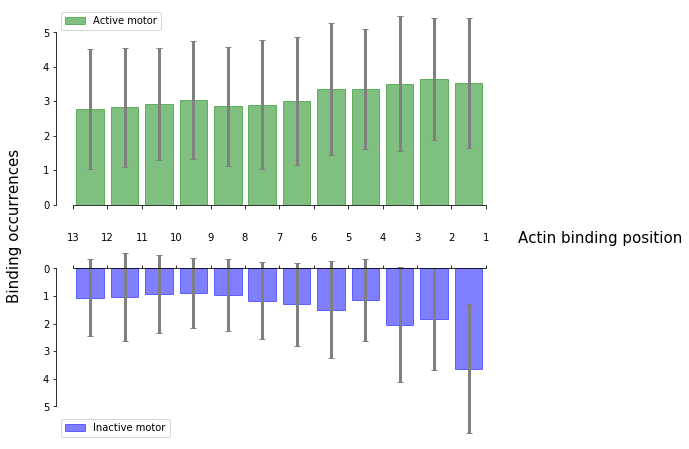

In [199]:
fig =plt.figure(figsize=(8,8))
ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
#plt.subplots_adjust(hspace=0.15)

bins = np.arange(1.5,13.5)

ax.bar(bins,abm_mn, yerr=abm_std, align='center', ecolor='gray', error_kw=dict(lw=3,capsize=3,capthick=1), facecolor='green', alpha=0.5, ec='green', label='Active motor')
ax.set_xticks(np.arange(1,14,1))
ax.set_yticks(np.arange(0,6,1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_bounds(1,13)
ax.spines['left'].set_bounds(0,5)
ax.invert_xaxis()
ax.tick_params(axis='x', which='both', pad=25)
ax.legend()
ax2.bar(bins,ibm_mn, yerr=ibm_std, align='center', ecolor='gray', error_kw=dict(lw=3,capsize=3,capthick=1),facecolor='blue', alpha=0.5, ec='blue', label='Inactive motor')
ax2.set_xticks(np.arange(1,14,1))
ax2.set_yticks(np.arange(0,6,1))
ax2.spines['bottom'].set_position('zero')
ax2.spines['bottom'].set_bounds(1,13)
ax2.spines['left'].set_bounds(0,5)
ax2.invert_yaxis()
ax2.invert_xaxis()
ax2.tick_params(axis='x', direction='in')#, length=6, width=2, colors='r',grid_color='r', grid_alpha=0.5)
ax2.set_xticklabels([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.legend()

fig.text(1.07, 0.47, 'Actin binding position', ha='center', fontsize=15)
fig.text(0.04, 0.5, 'Binding occurrences', va='center', rotation='vertical', fontsize=15)

#plt.savefig('fig/motors_MNpos.svg', fmt='.svg', dpi=1200, bbox_inches='tight')
#plt.savefig('fig/motors_MNpos.png', fmt='.png', dpi=1200, bbox_inches='tight')

plt.show()